# Unsupervised Learning: Clustering



* The task of grouping a set of objects in such a way that objects in the same group (called a cluster) are more similar (in some sense or another) to each other than to those in other groups (clusters). 

Examples:

* Natural Language Processing (NLP)

* Computer Vision

* Stock markets

* Customer / Market Segmentation

## Types:

### Connectivity-based clustering
* Distance based
* E.g., Hierarchical clustering


### Centroid-based clustering
* Represents each cluster by a single mean vector
* E.g., k-means algoritm


### Distribution-based clustering
* Modeled using statistical distributions
* E.g., Multivariate normal distributions used by the expectation-maximization algorithm.


### Density-based clustering
* Defines clusters as connected dense regions in the data space.
* E.g., DBSCAN



*** 

[MLXTEND](http://rasbt.github.io/mlxtend/)

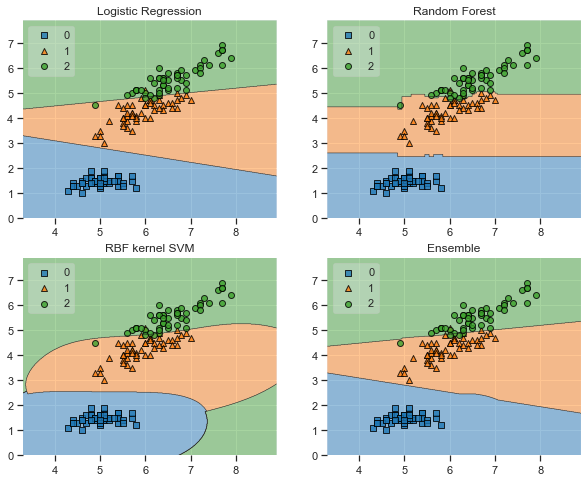

In [33]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.gridspec as gridspec 
# itertools computes the cartesian product of input iterables
import itertools
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
# EnsembleVoteClassifier is a meta-classifier for combining similar or conceptually 
# different machine learning classifiers for classification via majority or plurality voting
from mlxtend.classifier import EnsembleVoteClassifier
from mlxtend.data import iris_data
from mlxtend.plotting import plot_decision_regions

# Initializing Classifiers
#1# solver: algorithm to use in the optimization problem; lbfgs - for multiclass problems, handle multinomial loss
#1# multi_class (auto choose depending on given data or solver): 'ovr' - binary problem is fit for each label;
### 'multinomial' - the loss minimised is the multinomial loss fit across the entire probability distribution, even when the data is binary
#2# n_estimators: the number of trees in the forest    
#3# gamma: kernel coefficient for ‘rbf’, ‘poly’ and ‘sigmoid’. If ‘auto’, uses 1 / n_features
### probability: must be enabled prior to calling fit
clf1 = LogisticRegression(random_state=0, solver='lbfgs', multi_class='auto') 
clf2 = RandomForestClassifier(random_state=0, n_estimators=100)
clf3 = SVC(random_state=0, probability=True, gamma='auto')
eclf = EnsembleVoteClassifier(clfs=[clf1, clf2, clf3], weights=[2,1,1], voting='hard')

# Loading some example data
X, y = iris_data()
X = X[:,[0,2]]


# Plotting Decision Regions
#1# Specifies the geometry (rows,columns) of the grid that a subplot can be placed in
gs = gridspec.GridSpec(2,2)
fig = plt.figure(figsize=(10,8))

for clf, lab, grd in zip([clf1, clf2, clf3, eclf],
                        ['Logistic Regression', 'Random Forest', 'RBF kernel SVM', 'Ensemble'],
                        itertools.product([0,1], repeat=2)):
    clf.fit(X,y)
    ax = plt.subplot(gs[grd[0], grd[1]])
    fig = plot_decision_regions(X=X, y=y, clf=clf, legend=2)
    plt.title(lab)
plt.show()

***

# Ward’s Agglomerative Hierarchical Clustering

* Agglomerative: 
  * Bottom up
  * Each observation starts in its own cluster, and pairs of clusters are merged as one moves up the hierarchy.


* Divisive: 
  * Top down
  * All observations start in one cluster, and splits are performed recursively as one moves down the hierarchy.
  
[Stackexchange](https://stats.stackexchange.com/questions/195446/choosing-the-right-linkage-method-for-hierarchical-clustering)

[CMU Notes](http://www.stat.cmu.edu/~ryantibs/datamining/lectures/05-clus2-marked.pdf)



1. Single Linkage: shortest distance. Distance between two clusters to be the **minimum distance between any single data point in the first cluster and any single data point in the second cluster**. 

2. Complete Linkage: Furthest distance. Distance between two clusters to be the **maximum distance between any single data point in the first cluster and any single data point in the second cluster**.

3. Average Linkage: Average. 

4. Centroid Method: Distance between two clusters is the **distance between the two mean vectors of the clusters**.

5. Ward’s Method: ANOVA based approach. 
    * Iterative process
    * Minimises the total within cluster variance
    * At each step, the pair of clusters with minimum between cluster distance are merged

In [34]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import pandas as pd
import seaborn as sns
sns.set()

In [35]:
from sklearn.datasets.samples_generator import make_blobs

In [36]:
X, y = make_blobs(n_samples=600, centers=5, cluster_std=0.60, random_state=42)

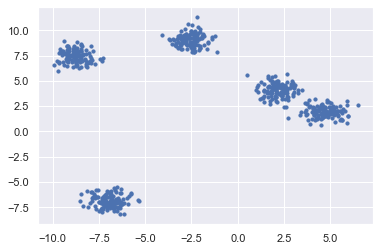

In [37]:
plt.scatter(X[:,0], X[:,1], s=10)

In [38]:
from scipy.cluster.hierarchy import ward, dendrogram, linkage

In [41]:
#1# suppress: True - print floating point numbers using fixed point notation, false - scientific notation from some value
np.set_printoptions(precision=4, suppress=True)

In [42]:
#1# linkage: perform hierarchical/agglomerative clustering (2nd argument is a chosen method)
distance = linkage(X, 'ward')

## Dendrogram

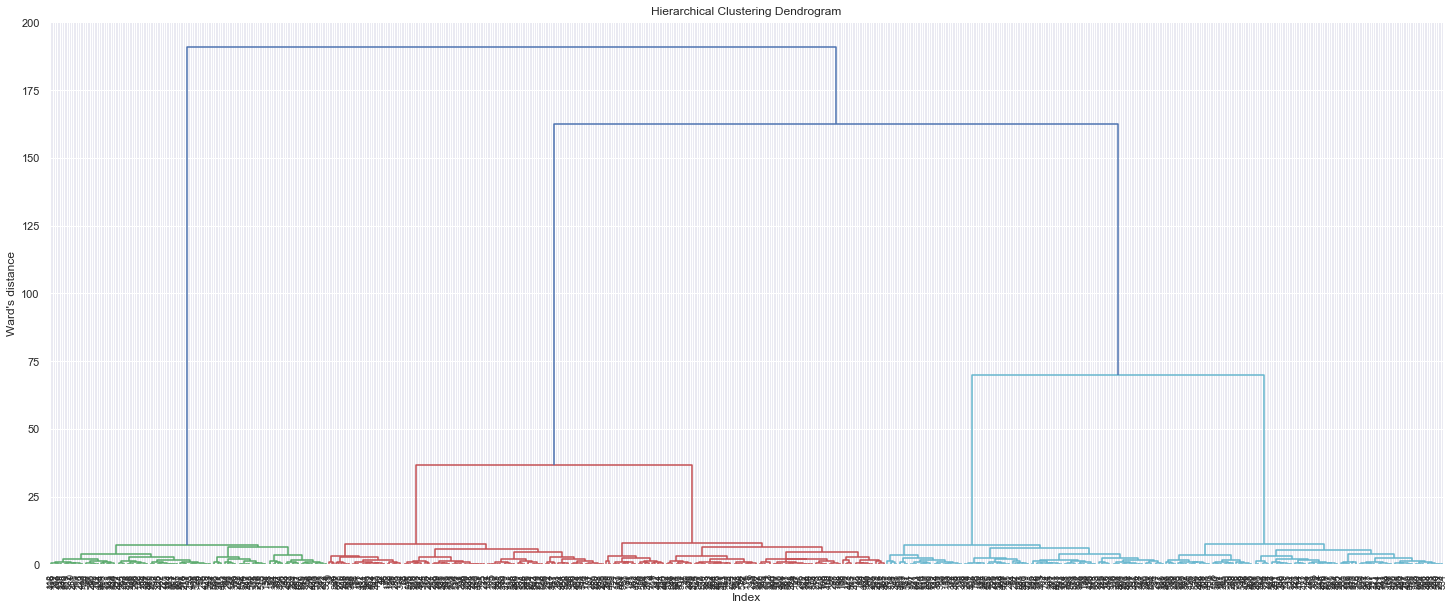

In [43]:
plt.figure(figsize=(25,10))
plt.title("Hierarchical Clustering Dendrogram")
plt.xlabel("Index")
plt.ylabel("Ward's distance")
dendrogram(distance, 
           leaf_rotation=90., 
           leaf_font_size=9.,);

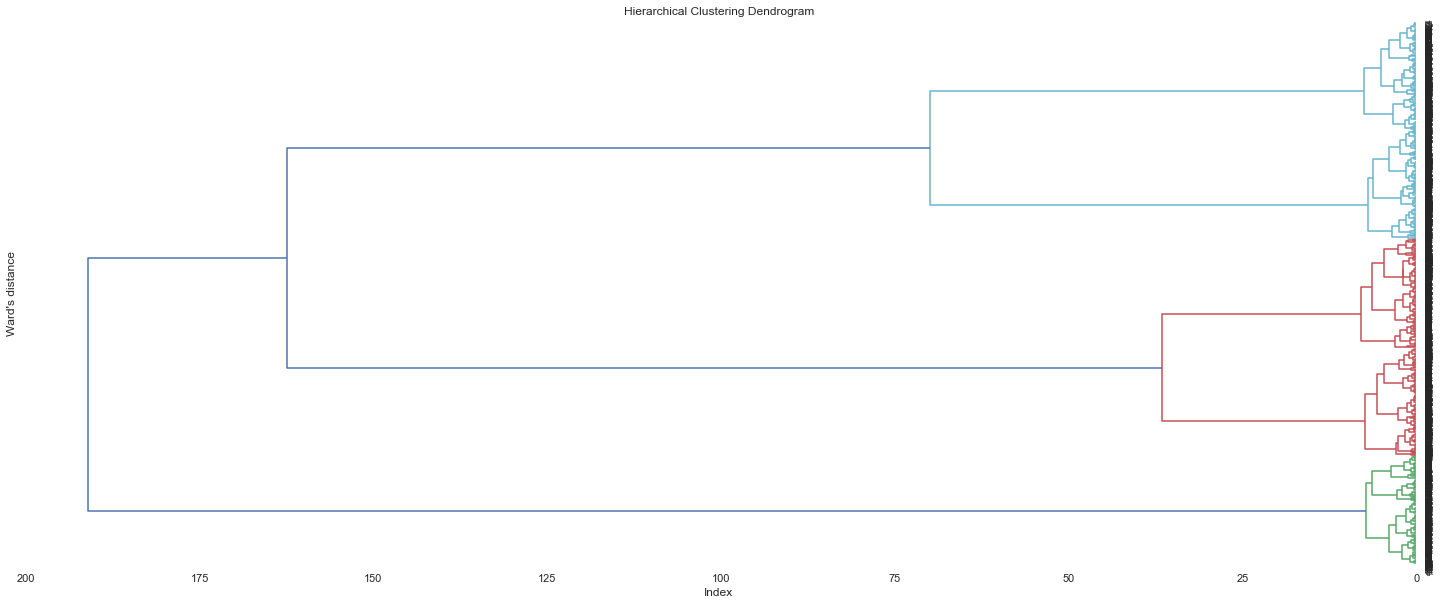

In [44]:
plt.figure(figsize=(25,10))
plt.title("Hierarchical Clustering Dendrogram")
plt.xlabel("Index")
plt.ylabel("Ward's distance")
dendrogram(distance, orientation="left",
           leaf_rotation=90.,
           leaf_font_size=9.,);

# Truncating Dendrogram

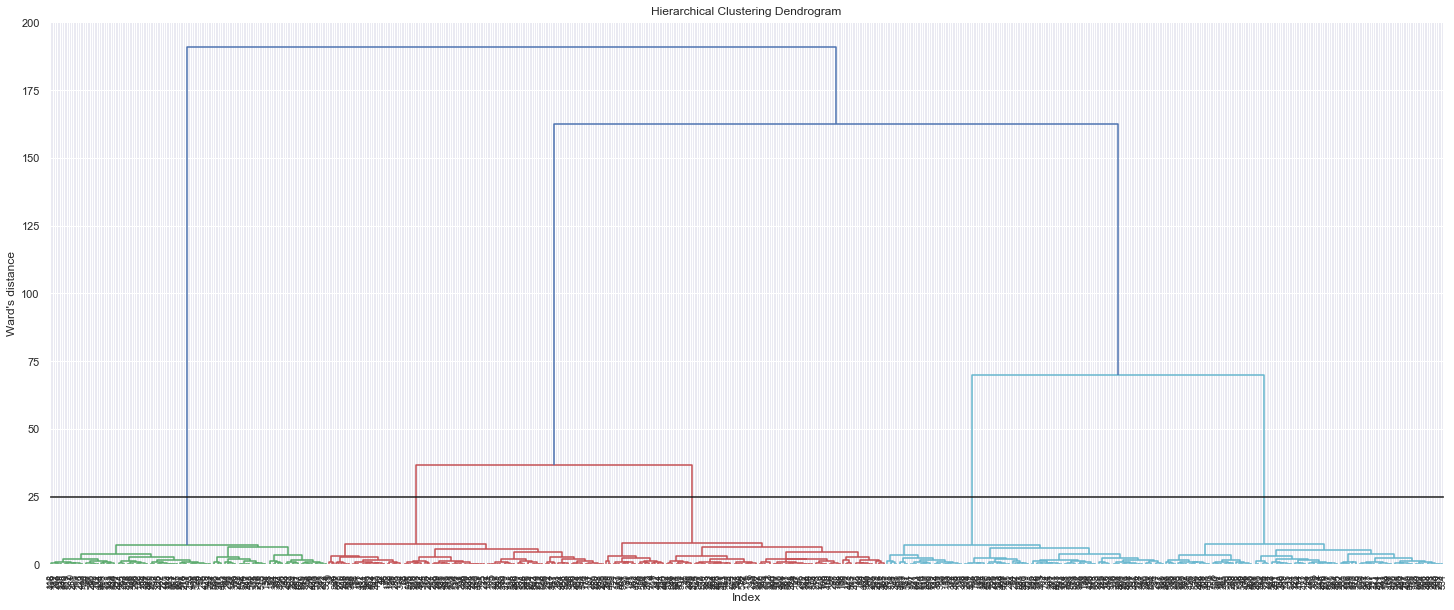

In [45]:
plt.figure(figsize=(25,10))
plt.title("Hierarchical Clustering Dendrogram")
plt.xlabel("Index")
plt.ylabel("Ward's distance")
dendrogram(distance,
           leaf_rotation=90.,
           leaf_font_size=9.,);
plt.axhline(25, c='k');

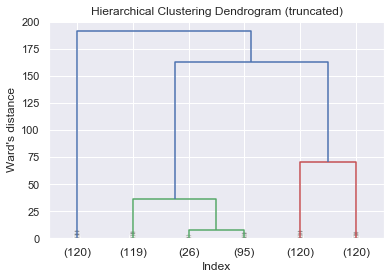

In [48]:
plt.title('Hierarchical Clustering Dendrogram (truncated)')
plt.xlabel('Index')
plt.ylabel("Ward's distance")
#1# truncate_mode: if 'lastp', then shows only last p merged clusters
dendrogram(distance, truncate_mode='lastp',
          p=6, leaf_rotation=0., leaf_font_size=12.,
          show_contracted=True);

### Retrieve the Clusters

* Utilise the [fcluster](https://docs.scipy.org/doc/scipy/reference/generated/scipy.cluster.hierarchy.fcluster.html) function.

* Retrieve by distance or number of clusters

### By distance

In [51]:
from scipy.cluster.hierarchy import fcluster
max_d = 25 # according to ward's distance on above dendrograms
#1# fclusters shows which point belongs to which cluster (e.g., point 1 belongs to cluster 1, point 3 belongs to cluster 5)
clusters = fcluster(distance, max_d, criterion='distance')
clusters

array([1, 1, 5, 3, 3, 2, 3, 4, 5, 2, 1, 5, 2, 4, 4, 1, 4, 3, 5, 3, 4, 3,
       2, 5, 5, 2, 2, 3, 3, 3, 1, 4, 5, 1, 1, 3, 2, 2, 1, 4, 3, 2, 2, 1,
       1, 2, 2, 3, 5, 3, 4, 2, 1, 2, 4, 3, 4, 1, 1, 3, 2, 4, 1, 4, 3, 2,
       1, 3, 2, 2, 5, 3, 1, 3, 5, 1, 4, 5, 1, 5, 3, 1, 1, 3, 3, 4, 3, 1,
       5, 5, 5, 1, 4, 4, 2, 2, 4, 4, 3, 1, 3, 5, 4, 5, 5, 1, 3, 4, 3, 4,
       4, 5, 4, 3, 5, 2, 5, 4, 1, 1, 5, 5, 3, 3, 2, 4, 4, 4, 5, 2, 2, 1,
       1, 4, 3, 4, 2, 2, 2, 1, 5, 2, 2, 1, 4, 5, 4, 1, 2, 1, 5, 2, 1, 4,
       1, 4, 2, 3, 5, 5, 3, 3, 3, 4, 2, 4, 4, 3, 4, 1, 2, 2, 2, 4, 4, 3,
       2, 3, 4, 3, 2, 5, 3, 1, 1, 2, 4, 2, 5, 5, 2, 3, 4, 3, 1, 2, 5, 3,
       4, 2, 5, 4, 3, 5, 3, 5, 1, 1, 2, 2, 3, 3, 2, 3, 4, 1, 1, 5, 4, 2,
       2, 1, 5, 2, 5, 4, 1, 4, 3, 5, 2, 4, 2, 5, 3, 1, 1, 4, 4, 5, 4, 2,
       1, 3, 1, 3, 3, 4, 2, 2, 2, 1, 4, 5, 2, 3, 5, 1, 2, 2, 2, 4, 3, 1,
       3, 5, 1, 4, 4, 2, 2, 2, 1, 2, 3, 1, 3, 4, 5, 1, 5, 4, 5, 4, 4, 1,
       5, 2, 2, 3, 1, 1, 2, 1, 1, 5, 1, 3, 5, 4, 4,

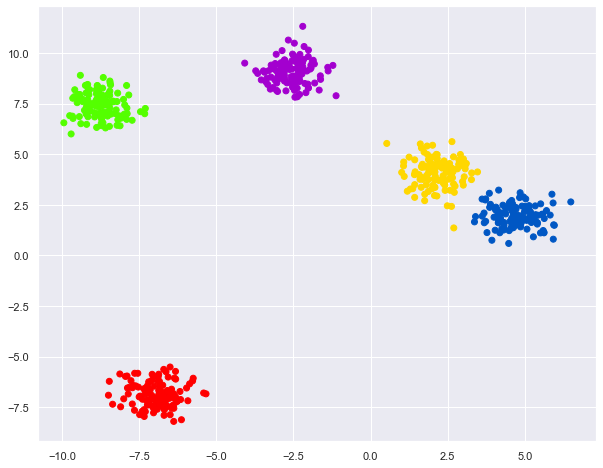

In [54]:
plt.figure(figsize=(10,8))
plt.scatter(X[:,0], X[:,1], c=clusters, cmap='prism');

### By Clusters

In [59]:
k = 5
clusters = fcluster(distance, k, criterion='maxclust')

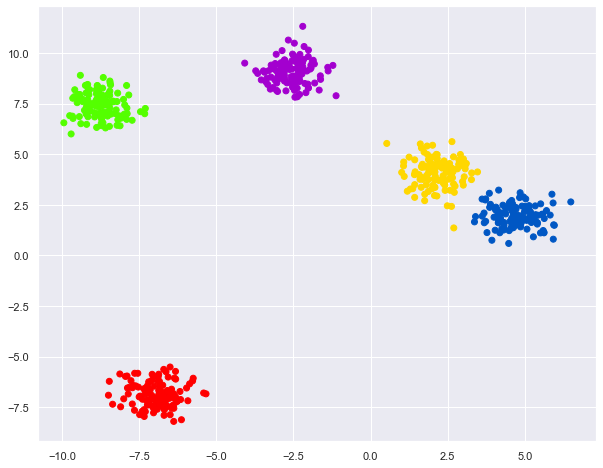

In [60]:
plt.figure(figsize=(10,8))
plt.scatter(X[:,0], X[:,1], c=clusters, cmap='prism')

***

***

# k-Means Clustering

* Analyse and find patterns / clusters within data

* Distance measures

[scikit learn](http://scikit-learn.org/stable/modules/clustering.html#k-means)

* Clusters data by trying to separate samples in n groups of equal variance
* Minimizing a criterion known as the inertia or within-cluster sum-of-squares. 
* Requires the number of clusters to be specified. 
* Scales well

How does it work?

* Divides a set of samples into disjoint clusters
* Each described by the mean of the samples in the cluster. 
* The means are commonly called the cluster “centroids”
* Note that the centroids are not, in general, points from, although they live in the same space. 
* The K-means algorithm aims to choose centroids that minimise the inertia, or **within-cluster sum of squared criterion**


In [62]:
from sklearn.cluster import KMeans

In [63]:
kmeans = KMeans(n_clusters=9)
kmeans.fit(X)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
       n_clusters=9, n_init=10, n_jobs=None, precompute_distances='auto',
       random_state=None, tol=0.0001, verbose=0)

In [66]:
y_kmeans = kmeans.predict(X)

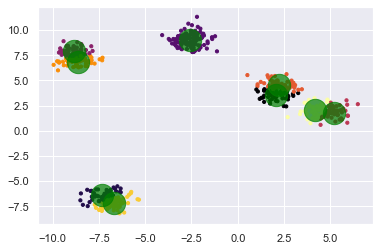

In [67]:
plt.scatter(X[:,0], X[:,1], c=y_kmeans, s=10, cmap='inferno')

centers = kmeans.cluster_centers_
plt.scatter(centers[:,0], centers[:,1], c='green', s=500, alpha=0.7)

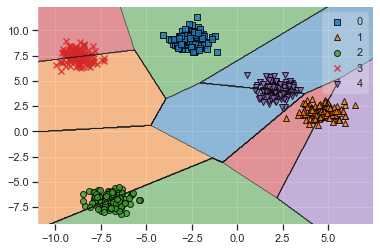

In [68]:
from mlxtend.plotting import plot_decision_regions
plot_decision_regions(X, y, clf=kmeans)

Some Challenges:

* The globally optimal result may not be achieved

* The number of clusters must be selected beforehand

* k-means is limited to linear cluster boundaries

* k-means can be slow for large numbers of samples

***
# Elbow Method


* Use intrinsic metrics 
* An example to this is the **within-cluster Sums of Squared Error** 
* scikit learn has already provided it via `inertia_` attribute


In [69]:
kmeans.inertia_

287.1506893594364

In [70]:
sse_ = []
for k in range(1,8):
    kmeans = KMeans(n_clusters=k).fit(X)
    sse_.append([k, kmeans.inertia_])

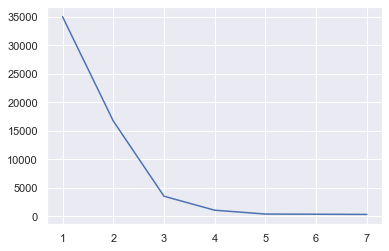

In [71]:
plt.plot(pd.DataFrame(sse_)[0], pd.DataFrame(sse_)[1])

***

# Silhouette Analysis

$$\text{silhouette score}=\frac{p-q}{max(p,q)}$$

$p$ is the mean distance to the points in the nearest cluster that the data point is not a part of

$q$ is the mean intra-cluster distance to all the points in its own cluster.

* The value of the silhouette score range lies between -1 to 1. 

* A score closer to 1 indicates that the data point is very similar to other data points in the cluster, 

* A score closer to -1 indicates that the data point is not similar to the data points in its cluster.

In [75]:
from sklearn.metrics import silhouette_score

In [76]:
sse_ = []
for k in range(2,8):
    kmeans = KMeans(n_clusters=k).fit(X)
    sse_.append([k, silhouette_score(X, kmeans.labels_)])

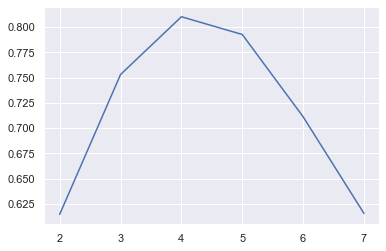

In [77]:
plt.plot(pd.DataFrame(sse_)[0], pd.DataFrame(sse_)[1])

****

# Mean Shift


* Identify centroids location

  * For each data point, it identifies a window around it
  * Computes centroid
  * Updates centroid location
  * Continue to update windows
  * Keep shifting the centroids, means, towards the peaks of each cluster. Hence the term Means Shift
  * Continues until centroids no longer move


* Used for object tracking

In [78]:
from sklearn.cluster import MeanShift, estimate_bandwidth

In [79]:
from itertools import cycle

In [83]:
bandwidth_X = estimate_bandwidth(X, quantile=0.1, n_samples=len(X))

In [84]:
meanshift_model = MeanShift(bandwidth=bandwidth_X, bin_seeding=True)
meanshift_model.fit(X)

MeanShift(bandwidth=0.9946702350329211, bin_seeding=True, cluster_all=True,
          min_bin_freq=1, n_jobs=None, seeds=None)

In [86]:
cluster_centers = meanshift_model.cluster_centers_

In [90]:
print('Centers of clusters: \n', cluster_centers)

Centers of clusters: 
 [[-2.6733  8.9994]
 [ 4.6837  1.9518]
 [-8.789   7.4687]
 [ 2.2375  4.1844]
 [-6.9235 -7.0323]]


In [94]:
labels = meanshift_model.labels_ # to which cluster the point belongs  (0-4)
num_clusters = len(np.unique(labels))
print('Number of clusters in input data =', num_clusters)

Number of clusters in input data = 5


Text(0.5, 1.0, 'Clusters')

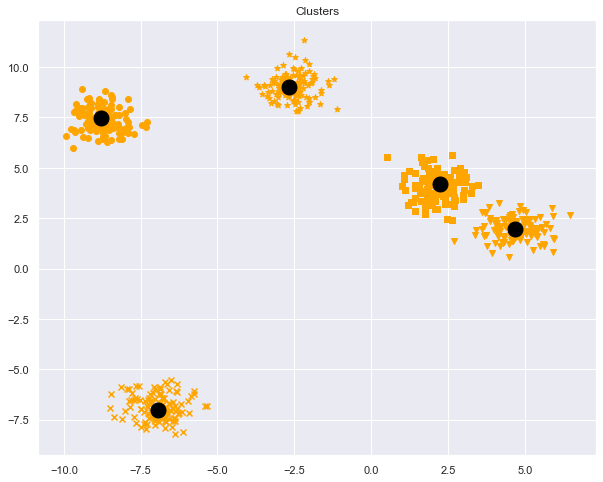

In [100]:
plt.figure(figsize=(10,8))
markers = '*vosx' # type of sign
for i, marker in zip(range(num_clusters), markers):
    plt.scatter(X[labels==i, 0], X[labels==i, 1], marker=marker, color='orange')
    cluster_center = cluster_centers[i]
    plt.plot(cluster_center[0], cluster_center[1], marker='o',
            markerfacecolor='black', markeredgecolor='black',
            markersize=15)
plt.title('Clusters')